### 날짜 시간 관련 함수
https://docs.python.org/3/library/datetime.html#available-types

### datetime
https://datascienceschool.net/01%20python/04.08%20%EC%8B%9C%EA%B3%84%EC%97%B4%20%EC%9E%90%EB%A3%8C%20%EB%8B%A4%EB%A3%A8%EA%B8%B0.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

In [2]:
train = pd.read_csv("bike-sharing-demand/train.csv")
test = pd.read_csv("bike-sharing-demand/test.csv")

In [3]:
train.head() #2011-01-01 00:00:00
# 년, 월, 일 추출

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### datetime 년, 월, 일 추출( 아래 방식 참고)

In [5]:
train.datetime.astype('datetime64').dt.year
train.datetime.astype('datetime64').dt.month
train.datetime.astype('datetime64').dt.day

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime, Length: 10886, dtype: int64

In [6]:
year = train["datetime"].str.split("-").str[0]
month = train["datetime"].str.split("-").str[1]
day = train["datetime"].str.split("-").str[2].str.split(" ").str[0]

In [7]:
year = train["datetime"].apply(lambda x:str(x)[0:4])
month = train["datetime"].apply(lambda x:str(x)[5:7])
day = train["datetime"].apply(lambda x:str(x)[8:10])

In [8]:
train['datetime'].apply(lambda x: x.split('-')[0])
train['datetime'].apply(lambda x: x.split('-')[1])
train['datetime'].apply(lambda x: x.split('-')[2][:2])

0        01
1        01
2        01
3        01
4        01
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime, Length: 10886, dtype: object

In [9]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day

### datetime 년, 월, 일 추출 다른 방식 parse_dates=["datetime"]
 parse_dates=["datetime"]에서 데이트타임 외 다른 날짜가 있다면 콤마를 이용 리스트 형식으로 만들기

In [10]:
df = pd.read_csv("bike-sharing-demand/train.csv", parse_dates=["datetime"])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [12]:
df["datetime"].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [13]:
df["datetime"].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, Length: 10886, dtype: int64

In [14]:
train = pd.read_csv("bike-sharing-demand/train.csv")

In [15]:
train['tempDate']=train.datetime.apply(lambda x:x.split())

In [16]:
train['tempDate']

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: tempDate, Length: 10886, dtype: object

In [17]:
train.tempDate.apply(lambda x:x[0].split("-"))

0        [2011, 01, 01]
1        [2011, 01, 01]
2        [2011, 01, 01]
3        [2011, 01, 01]
4        [2011, 01, 01]
              ...      
10881    [2012, 12, 19]
10882    [2012, 12, 19]
10883    [2012, 12, 19]
10884    [2012, 12, 19]
10885    [2012, 12, 19]
Name: tempDate, Length: 10886, dtype: object

In [18]:
train['year']=train.tempDate.apply(lambda x : x[0].split("-")[0])
train['month']=train.tempDate.apply(lambda x : x[0].split("-")[1])
train['day']=train.tempDate.apply(lambda x : x[0].split("-")[2])

### 날짜 축약형

In [19]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [20]:
list(calendar.day_abbr)

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [21]:
calendar.day_name[1]

'Tuesday'

# import locale이용해서 지역 설정

### datetime
https://datascienceschool.net/01%20python/04.08%20%EC%8B%9C%EA%B3%84%EC%97%B4%20%EC%9E%90%EB%A3%8C%20%EB%8B%A4%EB%A3%A8%EA%B8%B0.html

### 날짜, 시간 관련 함수
https://docs.python.org/3/library/datetime.html#available-types

In [22]:
import locale

In [23]:
locale.setlocale(locale.LC_ALL, "korean")

'Korean_Korea.949'

In [24]:
list(calendar.day_name)

['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

In [25]:
locale.setlocale(locale.LC_ALL, "de_DE")

'de_DE'

In [26]:
list(calendar.day_name)

['Montag',
 'Dienstag',
 'Mittwoch',
 'Donnerstag',
 'Freitag',
 'Samstag',
 'Sonntag']

In [27]:
locale.setlocale(locale.LC_ALL, "ru_RU")

'ru_RU'

In [28]:
list(calendar.day_name)

['понедельник',
 'вторник',
 'среда',
 'четверг',
 'пятница',
 'суббота',
 'воскресенье']

In [29]:
datetime.today()

datetime.datetime(2023, 10, 27, 17, 15, 13, 117943)

In [30]:
s = pd.Series(pd.date_range("2020-12-25", periods=100, freq="D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

In [31]:
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int64

### strftime, strptime

In [32]:
s.dt.strftime("%Y년 %m월 %d일")

0     2020-12-25 00:00:00
1     2020-12-26 00:00:00
2     2020-12-27 00:00:00
3     2020-12-28 00:00:00
4     2020-12-29 00:00:00
             ...         
95    2021-03-30 00:00:00
96    2021-03-31 00:00:00
97    2021-04-01 00:00:00
98    2021-04-02 00:00:00
99    2021-04-03 00:00:00
Length: 100, dtype: object

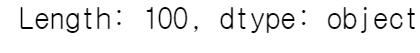
- 날짜형식 -> 문자열(object)

### strptime
- 문자열 -> 날짜형식

In [33]:
"""
%Y : 4자리 수 year
%y : 2자리 수 year
%m : 2자리 수 month (1~9월의 경우, 앞에 0을 채운다)
%d : 2자리 수 date (1~9일의 경우, 앞에 0을 채운다)
%H : 2자리 수 시간 (24-hour clock, 0~9시의 경우, 앞에 0을 채운다)
%M : 2자리 수 분 (0~9분의 경우, 앞에 0을 채운다)
%S : 2자리 수 초 (0~9초의 경우, 앞에 0을 채운다)
"""

'\n%Y : 4자리 수 year\n%y : 2자리 수 year\n%m : 2자리 수 month (1~9월의 경우, 앞에 0을 채운다)\n%d : 2자리 수 date (1~9일의 경우, 앞에 0을 채운다)\n%H : 2자리 수 시간 (24-hour clock, 0~9시의 경우, 앞에 0을 채운다)\n%M : 2자리 수 분 (0~9분의 경우, 앞에 0을 채운다)\n%S : 2자리 수 초 (0~9초의 경우, 앞에 0을 채운다)\n'

In [34]:
datetime.strptime("202310201053","%Y%m%d%H%M")

datetime.datetime(2023, 10, 20, 10, 53)

In [35]:
s.dt.year
s.dt.strftime("%Y년 %m월 %d일") #날짜형식 -> 문자열
#strptime() : 문자열 -> 날짜형식
print(datetime.strptime("202310201053", "%Y%m%d%H%M"))
"""
%Y : 4자리 수 year
%y : 2자리 수 year
%m : 2자리 수 month (1~9월의 경우, 앞에 0을 채운다)
%d : 2자리 수 date (1~9일의 경우, 앞에 0을 채운다)
%H : 2자리 수 시간 (24-hour clock, 0~9시의 경우, 앞에 0을 채운다)
%M : 2자리 수 분 (0~9분의 경우, 앞에 0을 채운다)
%S : 2자리 수 초 (0~9초의 경우, 앞에 0을 채운다)
"""

2023-10-20 10:53:00


'\n%Y : 4자리 수 year\n%y : 2자리 수 year\n%m : 2자리 수 month (1~9월의 경우, 앞에 0을 채운다)\n%d : 2자리 수 date (1~9일의 경우, 앞에 0을 채운다)\n%H : 2자리 수 시간 (24-hour clock, 0~9시의 경우, 앞에 0을 채운다)\n%M : 2자리 수 분 (0~9분의 경우, 앞에 0을 채운다)\n%S : 2자리 수 초 (0~9초의 경우, 앞에 0을 채운다)\n'

In [36]:
train
train["year"]=pd.to_numeric(train.year)
train["month"]=pd.to_numeric(train.month)
train["day"]=pd.to_numeric(train.day)

In [37]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,"[2011-01-01, 00:00:00]",2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,"[2011-01-01, 01:00:00]",2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,"[2011-01-01, 02:00:00]",2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,"[2011-01-01, 03:00:00]",2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,"[2011-01-01, 04:00:00]",2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,"[2012-12-19, 19:00:00]",2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,"[2012-12-19, 20:00:00]",2012,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,"[2012-12-19, 21:00:00]",2012,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,"[2012-12-19, 22:00:00]",2012,12,19


In [38]:
train['year']=pd.to_numeric(train.year)
train['month']=pd.to_numeric(train.month)
train['day']=pd.to_numeric(train.day)

In [39]:
train['hour']=train.tempDate.apply(lambda x : x[1].split(":")[0])

In [40]:
train.tempDate

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: tempDate, Length: 10886, dtype: object

In [41]:
datetime.today()

datetime.datetime(2023, 10, 27, 17, 15, 13, 230326)

In [42]:
s.dt.weekday

0     4
1     5
2     6
3     0
4     1
     ..
95    1
96    2
97    3
98    4
99    5
Length: 100, dtype: int64

In [43]:
s.dt.weekday.iloc[0]

4

In [44]:
list(calendar.day_name)[s.dt.weekday.iloc[0]]

'пятница'

In [45]:
s = pd.Series(pd.date_range("2023-10-20", periods=10, freq="D"))
s

0   2023-10-20
1   2023-10-21
2   2023-10-22
3   2023-10-23
4   2023-10-24
5   2023-10-25
6   2023-10-26
7   2023-10-27
8   2023-10-28
9   2023-10-29
dtype: datetime64[ns]

In [46]:
locale.setlocale(locale.LC_ALL, "english")

'English_United States.1252'

In [47]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [48]:
train.tempDate

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: tempDate, Length: 10886, dtype: object

In [49]:
train["weekday"]=train.tempDate.apply(lambda x:x[0])

In [50]:
train.tempDate.apply(lambda x:x[0])

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: tempDate, Length: 10886, dtype: object

In [51]:
train.tempDate.apply(lambda x:datetime.strptime(x[0],"%Y-%m-%d"))

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
10881   2012-12-19
10882   2012-12-19
10883   2012-12-19
10884   2012-12-19
10885   2012-12-19
Name: tempDate, Length: 10886, dtype: datetime64[ns]

In [52]:
train.tempDate.apply(lambda x:datetime.strptime(x[0],"%Y-%m-%d").weekday())

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: tempDate, Length: 10886, dtype: int64

In [53]:
train.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: tempDate, Length: 10886, dtype: object

In [54]:
train['weekday']=train.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])

In [55]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]",2011,1,1,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]",2011,1,1,01,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]",2011,1,1,02,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]",2011,1,1,03,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]",2011,1,1,04,Saturday


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  hour        10886 non-null  object 
 17  weekday     10886 non-null  object 
dtypes: float64(3), int64(11), object(4)
memory usage: 1.5+ MB


# to_numeric을 통해 형변환

In [57]:
train["hour"]=pd.to_numeric(train.hour)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  hour        10886 non-null  int64  
 17  weekday     10886 non-null  object 
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [59]:
train=train.drop('tempDate', axis=1)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  weekday     10886 non-null  object 
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


In [61]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,Wednesday


In [62]:
train.groupby("year")["count"].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

In [63]:
train.groupby("year")["count"].mean().reset_index()

,year,count
0,2011,144.223349
1,2012,238.560944


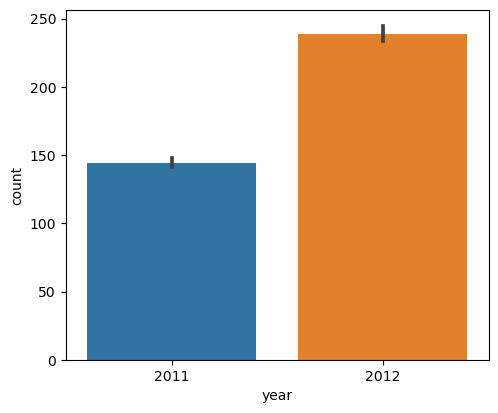

In [64]:
fig=plt.figure(figsize=[12,10])
ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x="year",y="count",data=train)

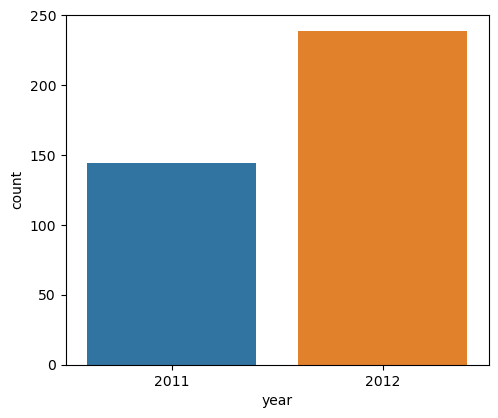

In [65]:
fig=plt.figure(figsize=[12,10])
ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x="year",y="count",data=train.groupby("year")["count"].mean().reset_index())

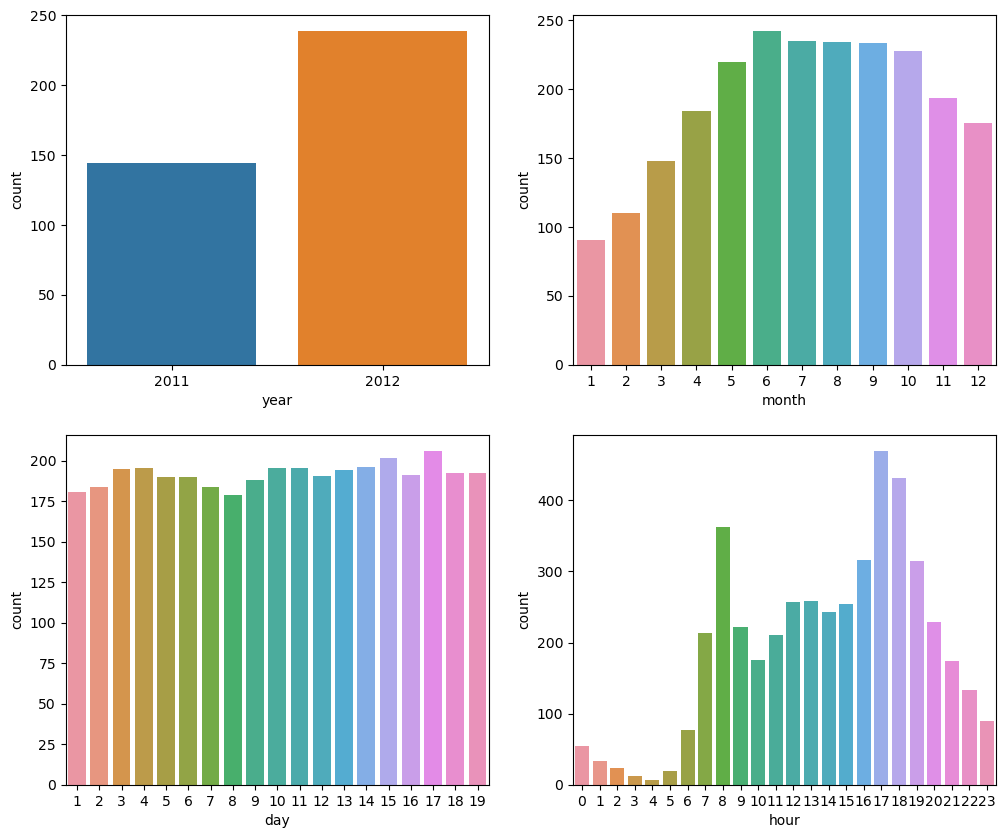

In [66]:
fig=plt.figure(figsize=[12,10])

ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x='year', y='count', data=train.groupby('year')['count'].mean().reset_index())
ax2=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index())
ax3=fig.add_subplot(2,2,3)
ax3=sns.barplot(x='day', y='count', data=train.groupby('day')['count'].mean().reset_index())
ax4=fig.add_subplot(2,2,4)
ax2=sns.barplot(x='hour', y='count', data=train.groupby('hour')['count'].mean().reset_index())

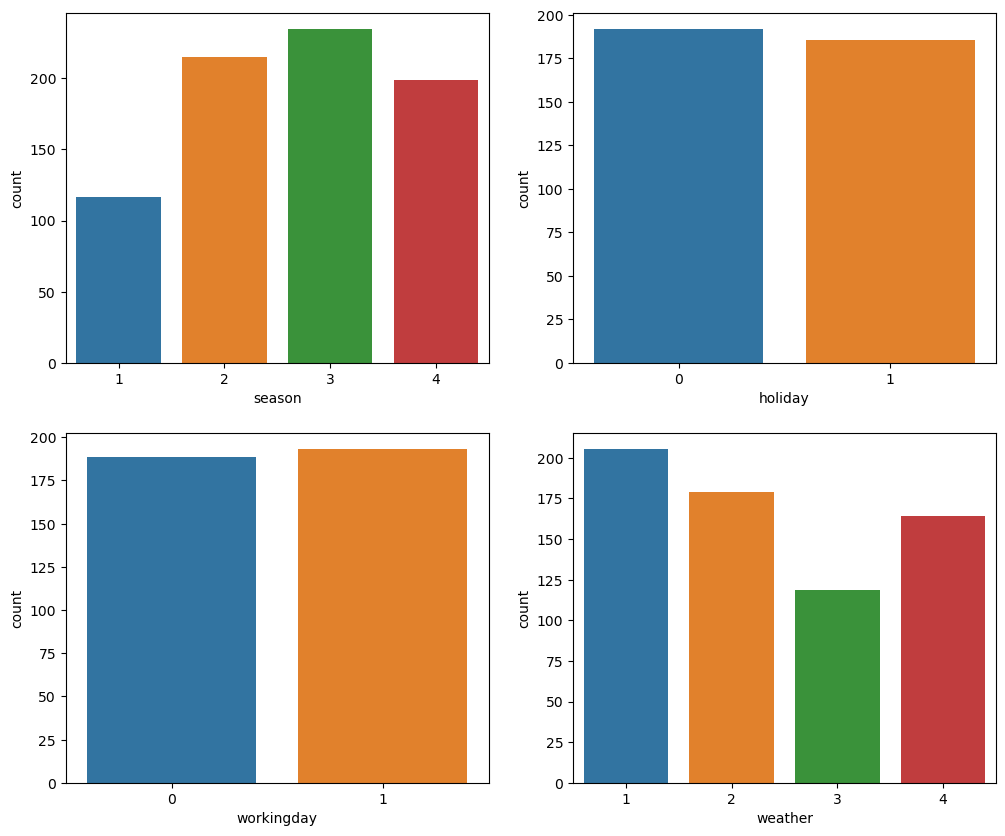

In [67]:
fig=plt.figure(figsize=[12,10])

ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index())
ax2=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index())
ax3=fig.add_subplot(2,2,3)
ax3=sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index())
ax4=fig.add_subplot(2,2,4)
ax4=sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index())

In [68]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [69]:
def newSeason(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

In [70]:
train.month
train.season
train.month.apply(newSeason)

0        4
1        4
2        4
3        4
4        4
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: month, Length: 10886, dtype: int64

In [71]:
train["season"]=train.month.apply(newSeason)

In [72]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


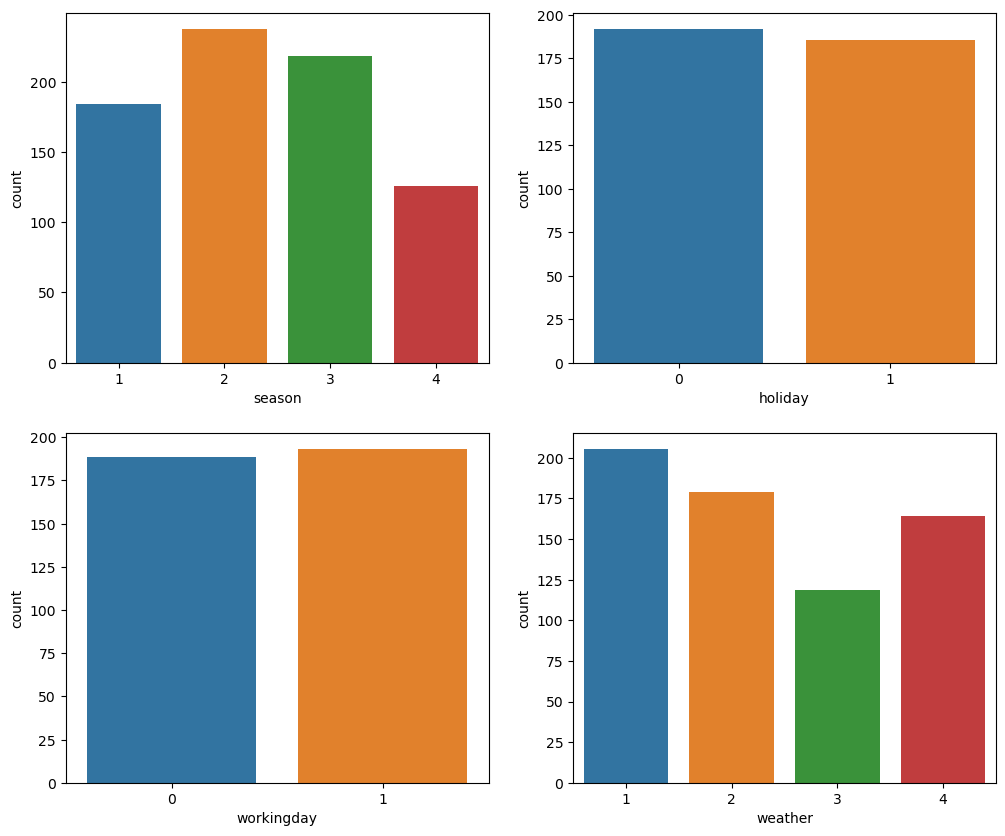

In [73]:
fig=plt.figure(figsize=[12,10])

ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index())
ax2=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index())
ax3=fig.add_subplot(2,2,3)
ax3=sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index())
ax4=fig.add_subplot(2,2,4)
ax4=sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index())

C:\Users\user\AppData\Local\Temp\ipykernel_17340\73733388.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(train.temp,bins=range(int(train.temp.min()),int(train.temp.max())+1))
C:\Users\user\AppData\Local\Temp\ipykernel_17340\73733388.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.dis

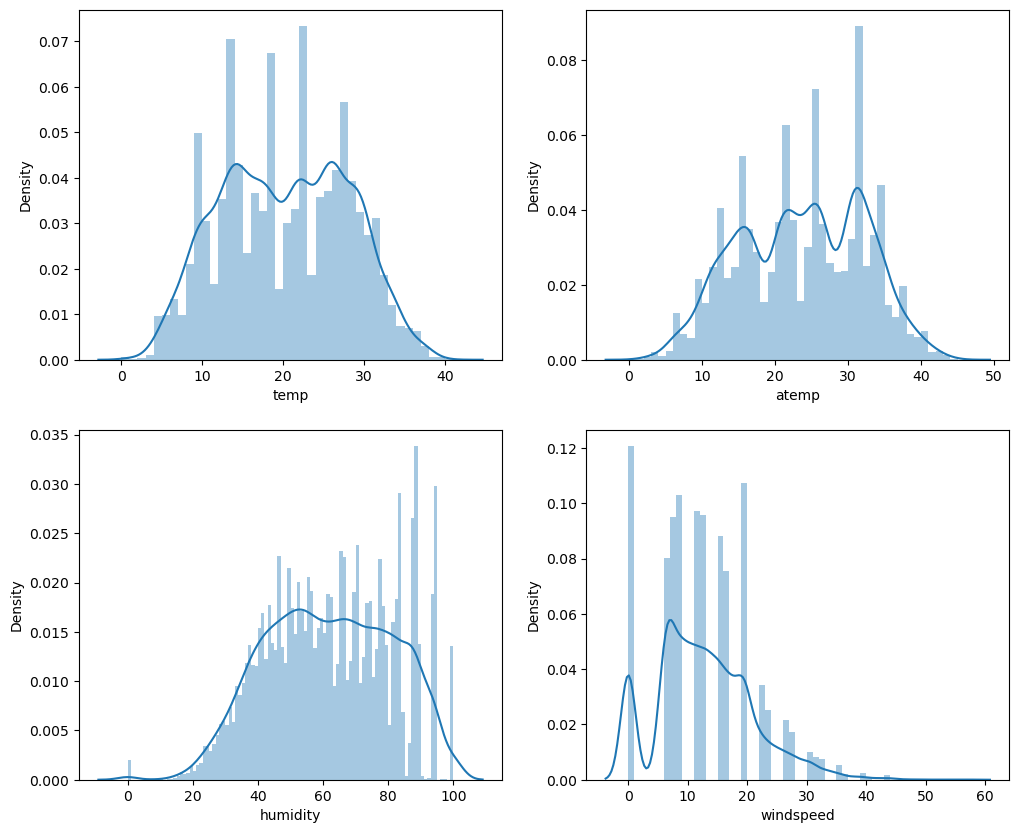

In [74]:
#온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp,bins=range(int(train.temp.min()),int(train.temp.max())+1))
#체감온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp,bins=range(int(train.atemp.min()),int(train.atemp.max())+1))

#습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity,bins=range(int(train.humidity.min()),int(train.humidity.max())+1))

#바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))

In [75]:
train.windspeed

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 10886, dtype: float64

In [76]:
train["windspeed"]==0

0         True
1         True
2         True
3         True
4         True
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Name: windspeed, Length: 10886, dtype: bool

In [77]:
train[train["windspeed"]==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,Monday
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,Monday
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,Tuesday
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,Tuesday


현재 풍속이 0인 값때문에 다른값으로 대체, 혹은 제거
혹은 계절별로 풍속 평균을 구해서 대체 그래서 **knn을 이용**

In [78]:
train.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_17340\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.041326,-0.029800,0.023406,-0.434241,-0.433335,0.042525,-0.052774,-0.212438,-0.072191,-0.118785,0.002976,0.201633,-0.001109,0.003424
holiday,0.041326,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.029800,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.023406,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,-0.434241,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,-0.433335,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.042525,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.052774,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,-0.212438,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,-0.072191,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


C:\Users\user\AppData\Local\Temp\ipykernel_17340\1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

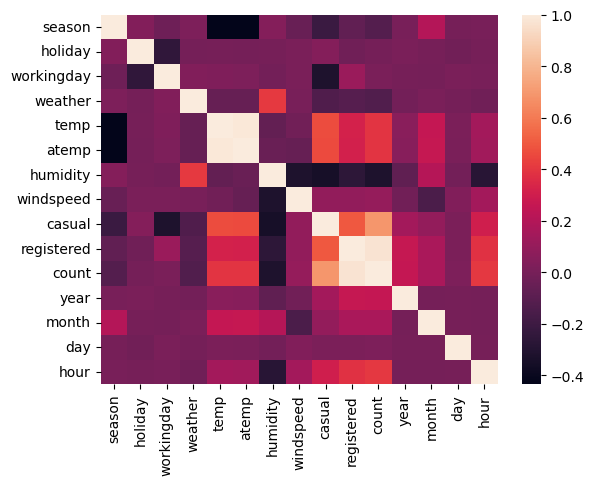

In [79]:
sns.heatmap(train.corr())

C:\Users\user\AppData\Local\Temp\ipykernel_17340\4081375753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,square=True)


<Axes: >

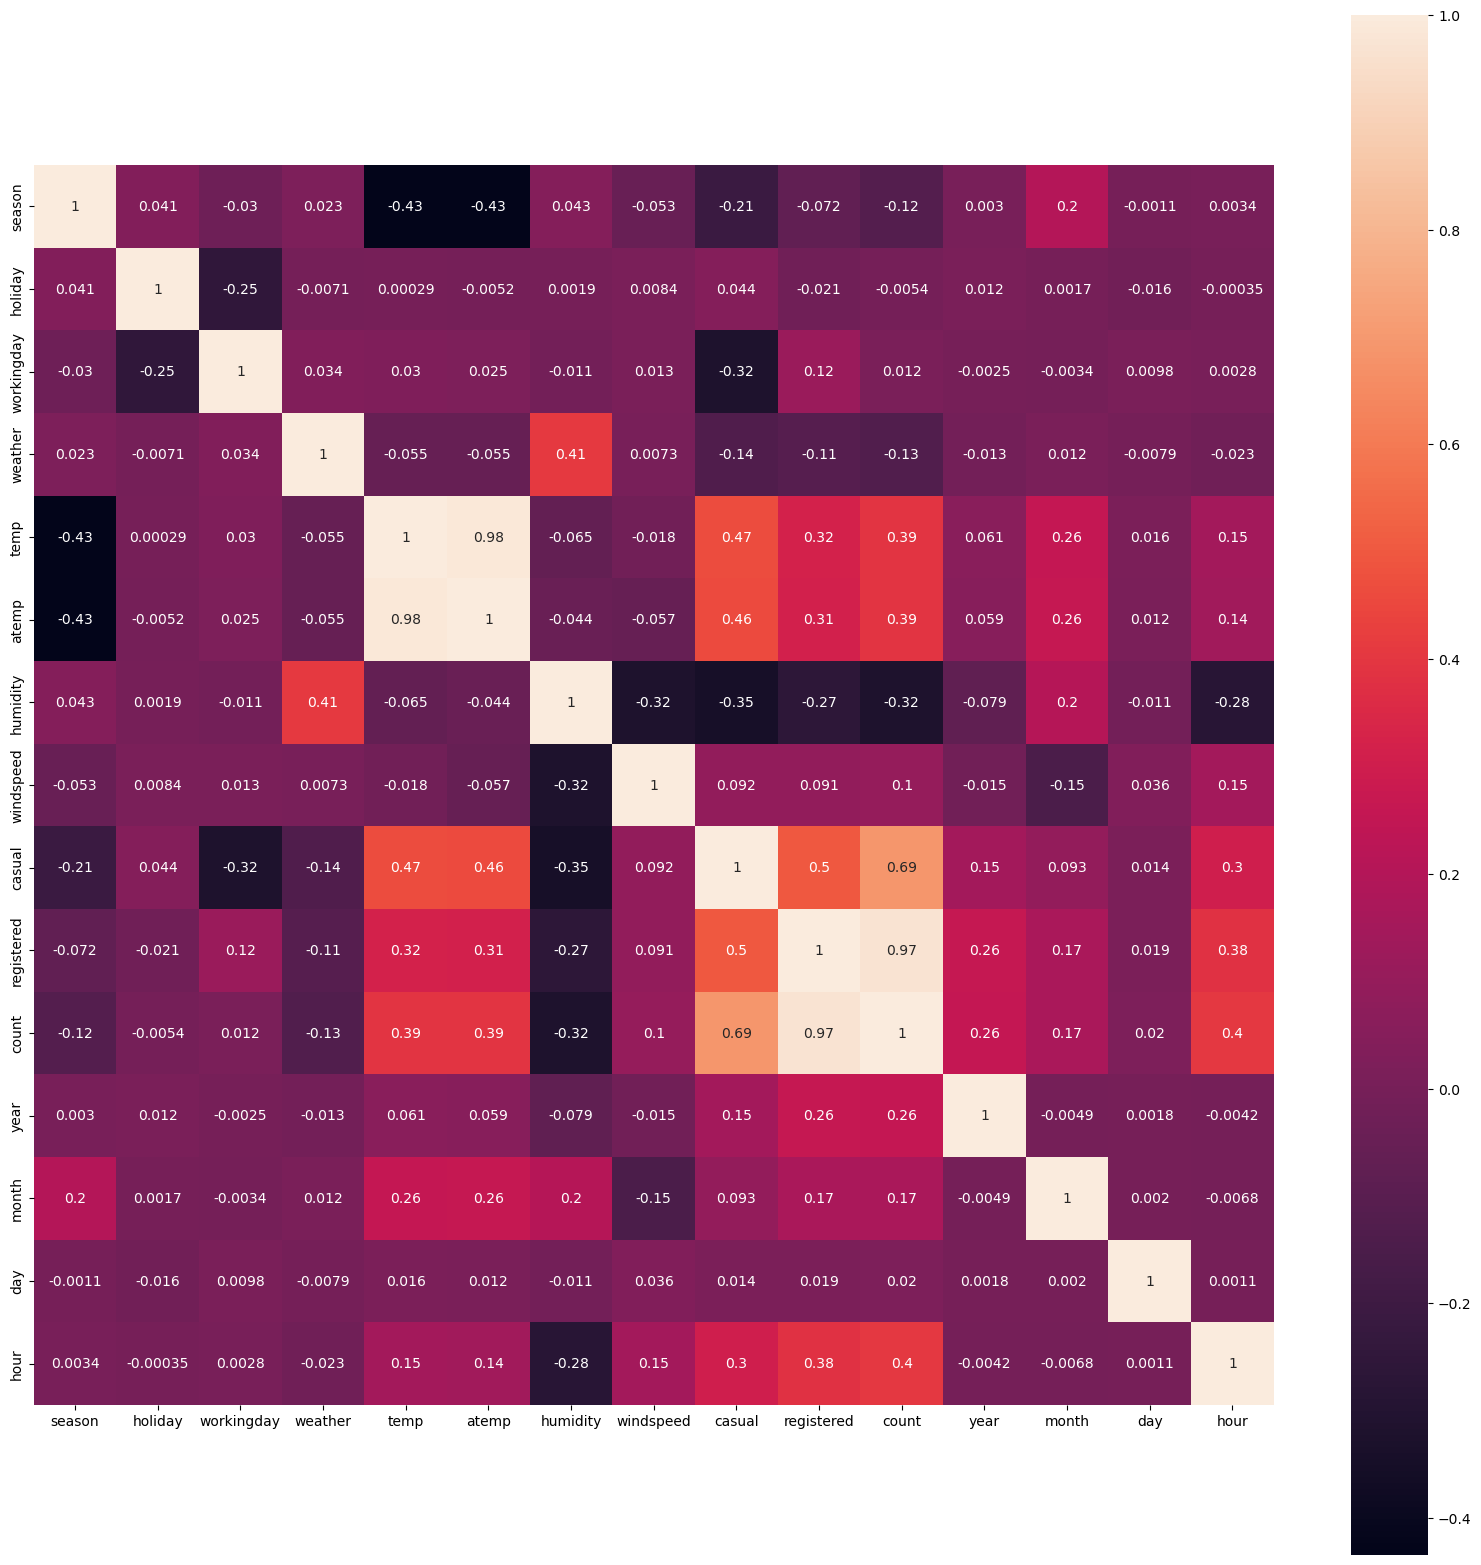

In [80]:
fig=plt.figure(figsize=[20,20])
sns.heatmap(train.corr(),annot=True,square=True)

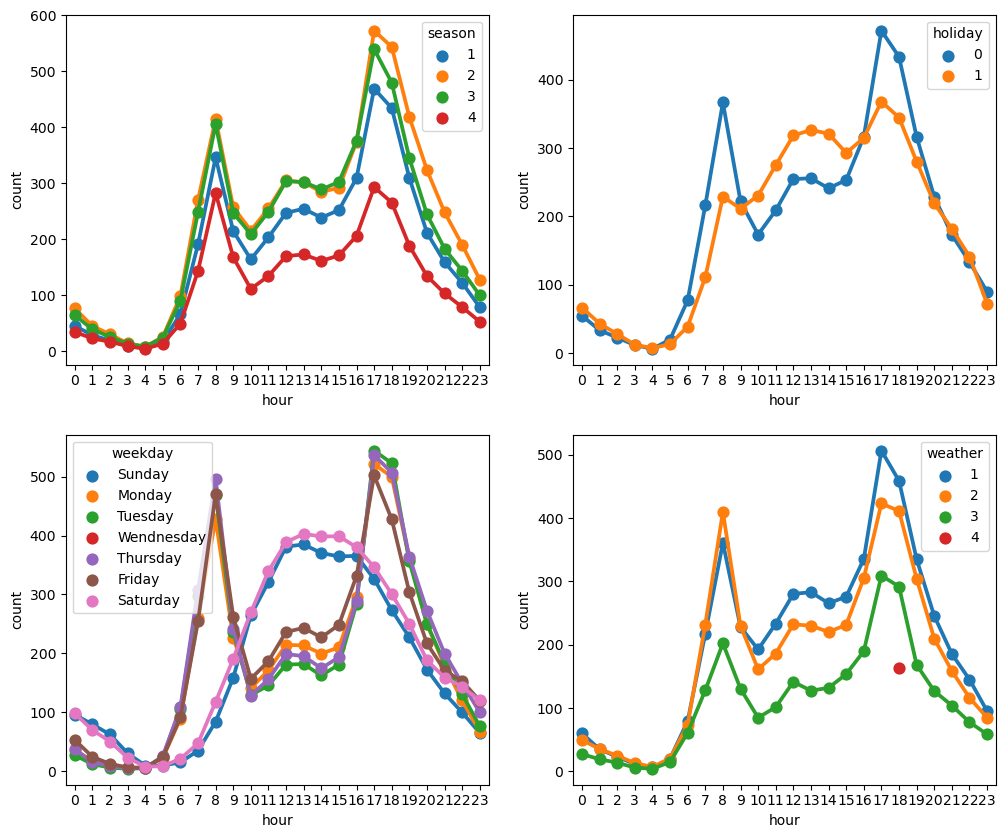

In [81]:
#시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

In [82]:
train[train.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,Monday


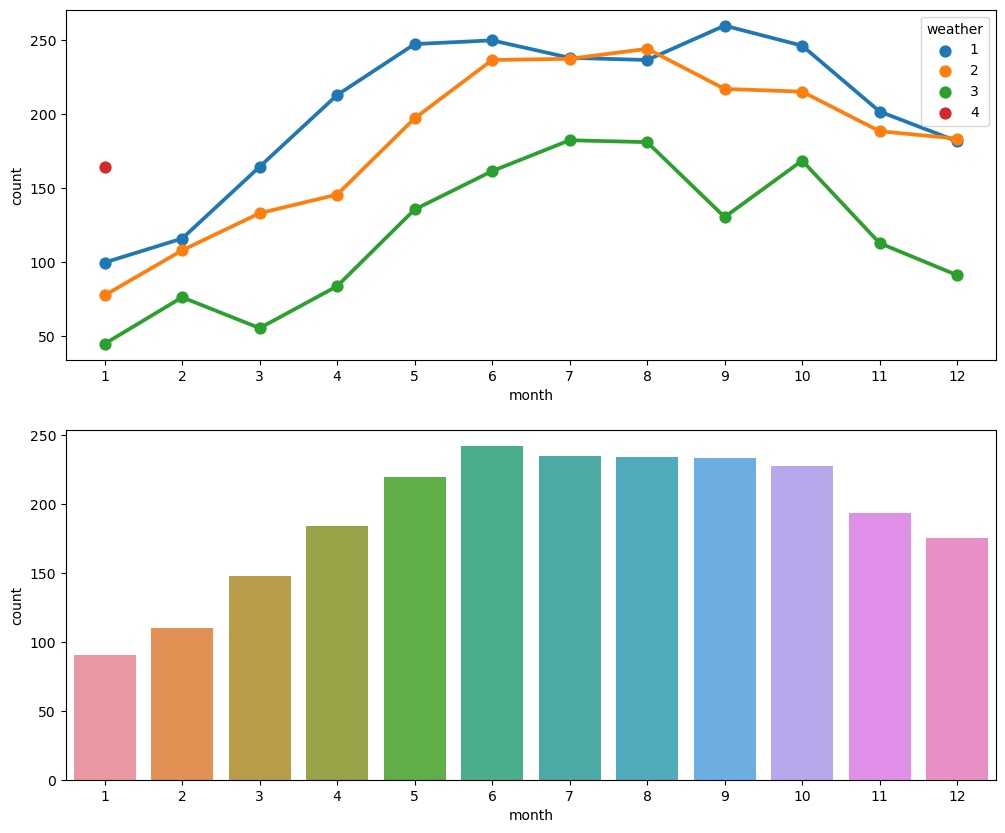

In [83]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())


ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  weekday     10886 non-null  object 
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


# 카테고리로 바꿔줌

In [85]:
train["weekday"]=train.weekday.astype("category")

In [86]:
train["weekday"].cat.categories=["5","1","6","0","4","2","3"]

C:\Users\user\AppData\Local\Temp\ipykernel_17340\627084243.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  train["weekday"].cat.categories=["5","1","6","0","4","2","3"]


In [87]:
train["weekday"]

0        6
1        6
2        6
3        6
4        6
        ..
10881    3
10882    3
10883    3
10884    3
10885    3
Name: weekday, Length: 10886, dtype: category
Categories (7, object): ['5', '1', '6', '0', '4', '2', '3']

In [88]:
pd.__version__

'1.5.3'

# 회기

In [89]:
"""
풍속이 0이 아닌 값들로 구성된 데이터프레임에서 풍속 예측 모델 생성
풍속이 0인 값들로 구성된 데이터프레임에 대한 풍속을 예측하여 값을 저장
"""
from sklearn.ensemble import RandomForestRegressor

In [90]:
windspeed_0=train[train["windspeed"]==0]
windspeed_not0=train[train["windspeed"]!=0]

In [91]:
windspeed_0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,6
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,1
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,1
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,2
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,2


In [92]:
windspeed_0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [93]:
import sys
sys.version

'3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]'

In [94]:
df=windspeed_0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday'],axis=1)

In [95]:
df

,season,weather,temp,atemp,humidity,year,month,hour
0,4,1,9.84,14.395,81,2011,1,0
1,4,1,9.02,13.635,80,2011,1,1
2,4,1,9.02,13.635,80,2011,1,2
3,4,1,9.84,14.395,75,2011,1,3
4,4,1,9.84,14.395,75,2011,1,4
...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,2012,12,12
10829,4,2,17.22,21.210,88,2012,12,15
10846,4,1,15.58,19.695,94,2012,12,8
10860,4,1,13.94,16.665,49,2012,12,22


In [96]:
windspeed_not0_df=windspeed_not0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday'],axis=1)

In [97]:
windspeed_not0_df

,season,weather,temp,atemp,humidity,year,month,hour
5,4,2,9.84,12.880,75,2011,1,5
10,4,1,15.58,19.695,76,2011,1,10
11,4,1,14.76,16.665,81,2011,1,11
12,4,1,17.22,21.210,77,2011,1,12
13,4,2,18.86,22.725,72,2011,1,13
...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,2012,12,19
10882,4,1,14.76,17.425,57,2012,12,20
10883,4,1,13.94,15.910,61,2012,12,21
10884,4,1,13.94,17.425,61,2012,12,22


In [98]:
windspeed_not0_series=windspeed_not0['windspeed']

In [99]:
windspeed_not0_df

,season,weather,temp,atemp,humidity,year,month,hour
5,4,2,9.84,12.880,75,2011,1,5
10,4,1,15.58,19.695,76,2011,1,10
11,4,1,14.76,16.665,81,2011,1,11
12,4,1,17.22,21.210,77,2011,1,12
13,4,2,18.86,22.725,72,2011,1,13
...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,2012,12,19
10882,4,1,14.76,17.425,57,2012,12,20
10883,4,1,13.94,15.910,61,2012,12,21
10884,4,1,13.94,17.425,61,2012,12,22


In [100]:
windspeed_not0_df
windspeed_not0_series

5         6.0032
10       16.9979
11       19.0012
12       19.0012
13       19.9995
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 9573, dtype: float64

# 랜덤포레스터 리그레서

In [101]:
rf=RandomForestRegressor()

In [102]:
windspeed_not0_df.columns

Index(['season', 'weather', 'temp', 'atemp', 'humidity', 'year', 'month',
       'hour'],
      dtype='object')

In [103]:
windspeed_0 = windspeed_0[['season', 'weather', 'temp', 'atemp', 'humidity', 'year', 'month',
       'hour']]

In [104]:
rf.fit(windspeed_not0_df,windspeed_not0_series)

RandomForestRegressor()

In [105]:
windspeed_0['windspeed']=rf.predict(windspeed_0)

C:\Users\user\AppData\Local\Temp\ipykernel_17340\2846071388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed_0['windspeed']=rf.predict(windspeed_0)


In [106]:
windspeed_0

,season,weather,temp,atemp,humidity,year,month,hour,windspeed
0,4,1,9.84,14.395,81,2011,1,0,7.592574
1,4,1,9.02,13.635,80,2011,1,1,7.627514
2,4,1,9.02,13.635,80,2011,1,2,7.627514
3,4,1,9.84,14.395,75,2011,1,3,6.197868
4,4,1,9.84,14.395,75,2011,1,4,6.177902
...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,2012,12,12,14.443918
10829,4,2,17.22,21.210,88,2012,12,15,10.871900
10846,4,1,15.58,19.695,94,2012,12,8,8.171387
10860,4,1,13.94,16.665,49,2012,12,22,12.518414


In [107]:
train[train.windspeed==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,6
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,1
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,1
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,2
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,2


In [108]:
pd.to_datetime(train.datetime)

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [109]:
train.datetime=pd.to_datetime(train.datetime)

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  weekday     10886 non-

In [111]:
train=train.sort_values(["datetime"])
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,6
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,3
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,3
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,3
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,3


In [112]:
train=train.sort_values(["datetime"],ascending=False)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,3
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,3
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,3
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,3
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,6


# 상관계수 바뀐거 한번 비교해보기

C:\Users\user\AppData\Local\Temp\ipykernel_17340\4081375753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,square=True)


<Axes: >

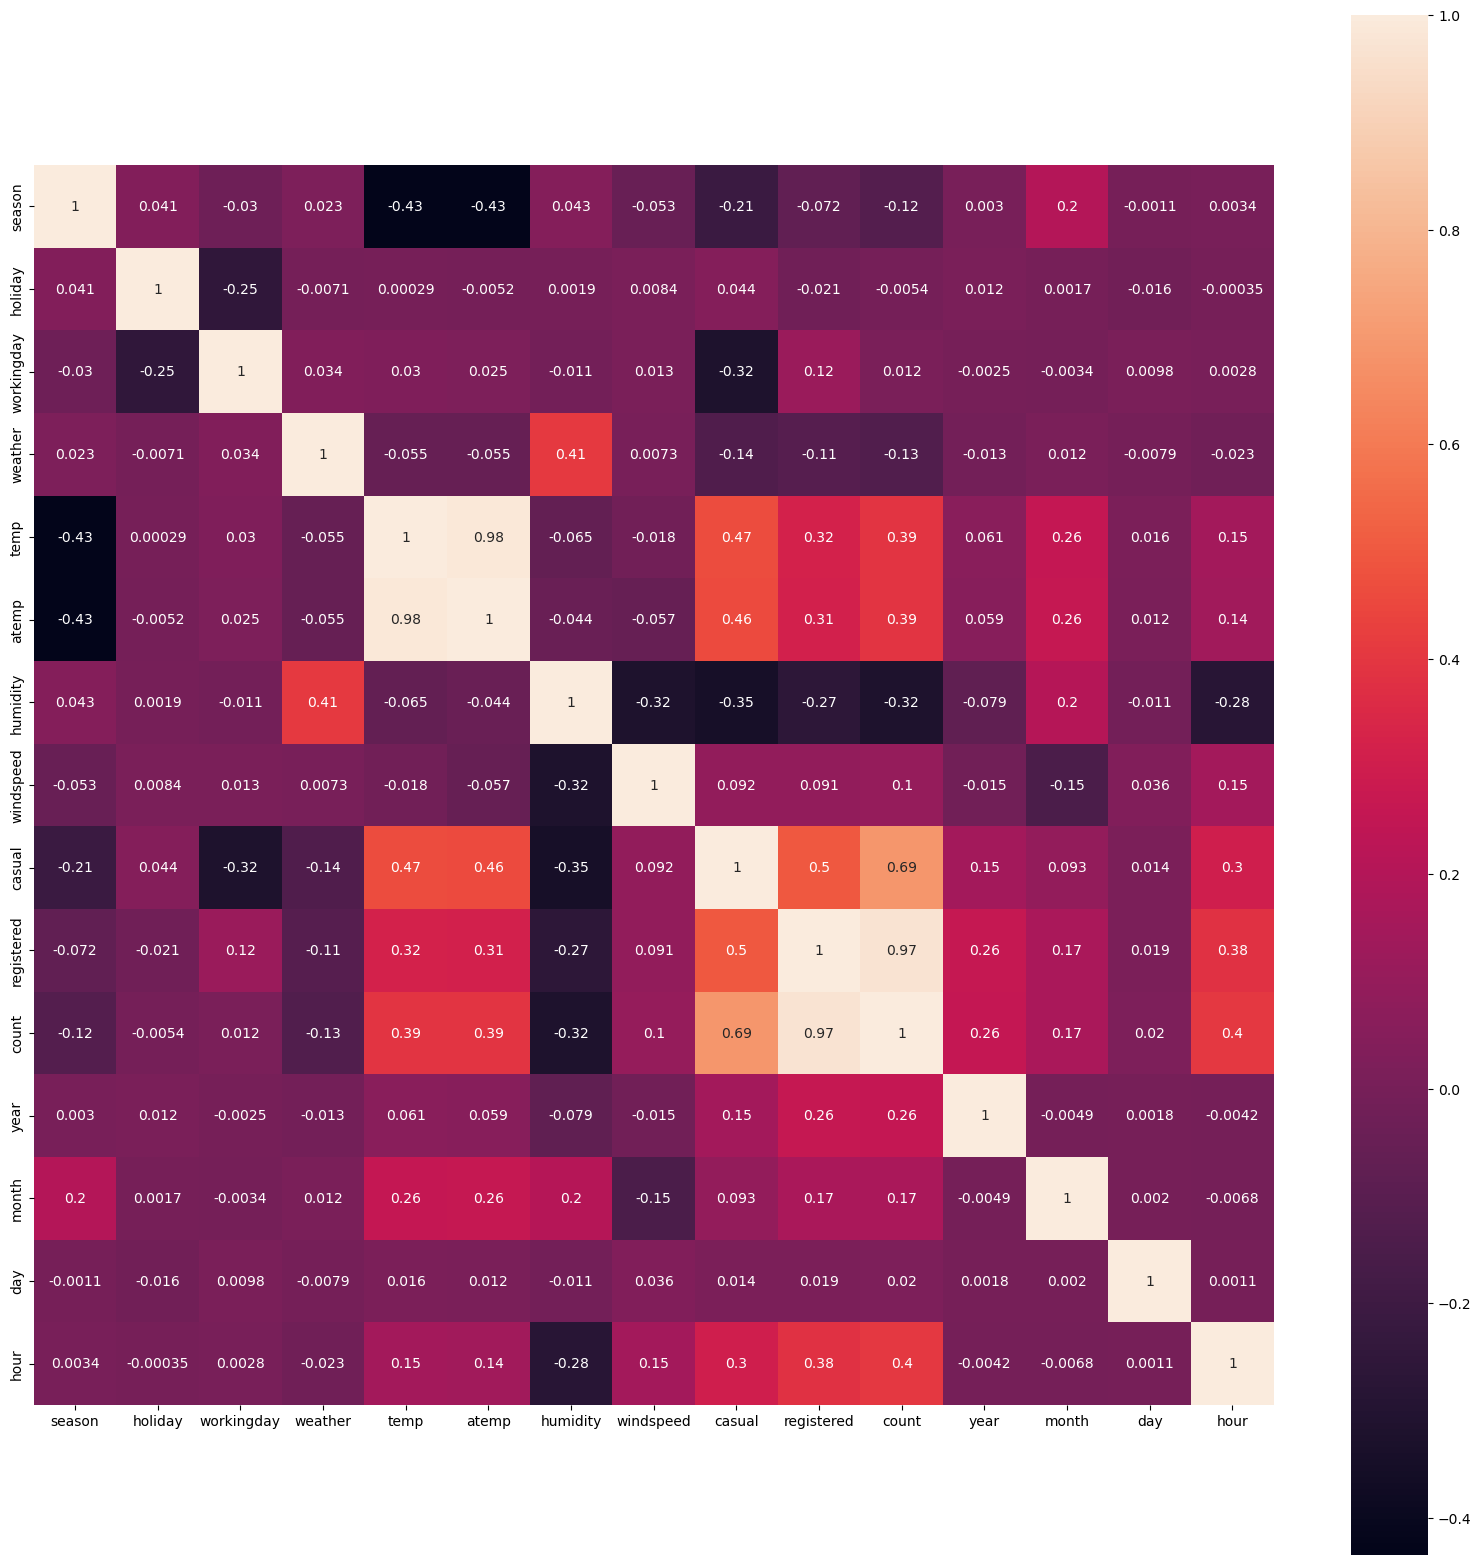

In [113]:
fig=plt.figure(figsize=[20,20])
sns.heatmap(train.corr(),annot=True,square=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17340\2520913288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))


<Axes: xlabel='windspeed', ylabel='Density'>

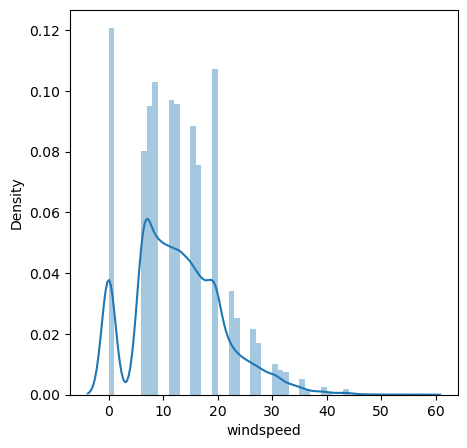

In [114]:
plt.figure(figsize=[5,5])
sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))